# Metody Obliczeniowe w Nauce i Technice Laboratorium 7
## Dekompozycja spektralna
### Błażej Kustra

In [1]:
import numpy as np
import itertools
import scipy.linalg
import sys
import random
import time
import matplotlib.pyplot as plt
import scipy 

### 1. Metoda potęgowa
Napisz funkcję obliczającą metodą potęgową dominującą wartość własną (największą co do modułu) i odpowiadający jej wektor własny dla danej macierzy rzeczywistej symetrycznej. Sprawdź poprawność działania programu porównując własną implementację z wynikami funkcji bibliotecznej. Przedstaw na wykresie zależność czasu obliczeń od rozmiaru macierzy (rozmiary macierzy 100x100, 500x500, ...).
* Powtarzaj mnożenie wektora xi przez macierz A: $x_{i+1} = Ax_{i}$ dzieląc za każdym razem wektor wynikowy przez ||xi+1||
* Element wektora xi o największej wartości bezwzględnej zbiega do dominującej wartości własne
* Przeskalowany wektor xi zbiega do dominującego wektora własnego
* Obliczenia powinny się zatrzymać po przekroczeniu maksymalnej liczby iteracji, albo w przypadku gdy ||xi −xi+1|| < e (kryterium małej poprawki
* Pod koniec obliczeń znormalizuj otrzymany wektor własny.

In [2]:
def power(A, epsilon=1e-9, max_iteration=10000):
    n = A.shape[0]
    x = np.random.uniform(size=(n, 1))
    iterations = 10000
    
    for i in range(max_iteration): # Obliczenia powinny zatrzymać sie po przekroczeniu maksymalnej liczby iteracji
        x_next = A @ x # Powtarzaj mnożenie wektora xi przez macierz A
        x_norm = x_next / np.linalg.norm(x_next, np.inf) # dzieląc za każdym razem wektor wynikowy przez norme
        
        if np.linalg.norm(x_norm - x) < epsilon: # Albo w przypadku gdy ||xi − xi+1|| < ε (kryterium małej poprawki)
            x = x_norm
            iterations = i
            break
            
        x = x_norm # Przeskalowany wektor xi zbiega do dominującego wektora własnego
        
    return np.linalg.norm(x_next, np.inf), (x/np.linalg.norm(x)), iterations # Pod koniec obliczeń znormalizuj otrzymany wektor własny.

Sprawdzenie poprawności zaimplementowanej funkcji:

In [3]:
A = np.array([
    [4,5,6],
    [1,2,3],
    [3,4,3]
])

eig_value, eig_vectors = np.linalg.eig(A)
print('np.linalg.eig:')
print(eig_value)
print(eig_vectors)

eig_value, eig_vectors, iterations = power(A)
print('\nzaimplementowana funkcja:')
print(eig_value)
print(eig_vectors)
print("ilosc iteracji:", iterations)

np.linalg.eig:
[ 9.85172586  0.46317564 -1.3149015 ]
[[-0.79595113 -0.78035802 -0.29114621]
 [-0.30186223  0.62256205 -0.59217034]
 [-0.52472945 -0.0588035   0.75137752]]

zaimplementowana funkcja:
9.851725857059211
[[0.79595113]
 [0.30186223]
 [0.52472945]]
ilosc iteracji: 11


Przedstaw na wykresie zależność czasu obliczeń od rozmiaru macierzy:

In [4]:
def measure_time(A):    
    start = time.time()
    eig_value_power, _, _ = power(A)
    end = time.time()
    
    eig_value_np, _ = np.linalg.eig(A)
    
    return end - start, abs(max(eig_value_np) - eig_value_power) < 1e-6 

macierz 100 x 100 eig_value poprawnie obliczona: True
macierz 200 x 200 eig_value poprawnie obliczona: True
macierz 300 x 300 eig_value poprawnie obliczona: True
macierz 400 x 400 eig_value poprawnie obliczona: True
macierz 500 x 500 eig_value poprawnie obliczona: True
macierz 600 x 600 eig_value poprawnie obliczona: True
macierz 700 x 700 eig_value poprawnie obliczona: True
macierz 800 x 800 eig_value poprawnie obliczona: True
macierz 900 x 900 eig_value poprawnie obliczona: True
macierz 1000 x 1000 eig_value poprawnie obliczona: True
macierz 1100 x 1100 eig_value poprawnie obliczona: True
macierz 1200 x 1200 eig_value poprawnie obliczona: True
macierz 1300 x 1300 eig_value poprawnie obliczona: True
macierz 1400 x 1400 eig_value poprawnie obliczona: True
macierz 1500 x 1500 eig_value poprawnie obliczona: True
macierz 1600 x 1600 eig_value poprawnie obliczona: True
macierz 1700 x 1700 eig_value poprawnie obliczona: True
macierz 1800 x 1800 eig_value poprawnie obliczona: True
macierz 19

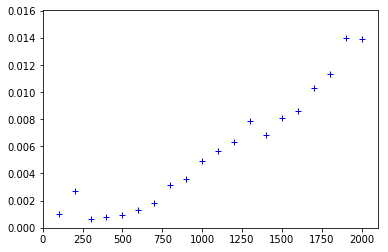

In [5]:
times = []
sizes = [size for size in range(100,2001,100)]

for n in sizes:
    A = np.random.randint(low=0, high=10, size=(n, n))
    A = (A + A.T)/2
    time_power, ok = measure_time(A)
    times.append(time_power)
    
    print("macierz", n,"x", n, "eig_value poprawnie obliczona:", ok)

limit = max(times)
plt.axis([0, max(sizes) + 100, 0.0, limit + 0.002])
plt.plot(sizes, times,'b+')
plt.show() 

Czasy dla odpowiednich wielkości macierzy 

### 2. Odwrotna metoda potęgowa
Opierając się na twierdzeniu o transformacji widma macierzy:

<b>Twierdzenie 1</b> Macierz $(A−σI)^{−1}$ (jeśli istnieje), to ma wartości własne równe $\frac{1}{({λ}_{k} −σ)}$ ($λ_k$ jest k-tą wartością macierzy <b>A</b>) i wektory własne identyczne z macierzą $A$.


oraz wykorzystując metodę potęgową i faktoryzację $LU$ zaimplementuj odwrotną metodę potęgową pozwalającą na szybkie znalezienie wektorów własnych macierzy $A$, dla wartości σ bliskich odpowiedniej wartości własnej. Wykorzystaj fakt, że mnożenie wektora $x_i$ przez macierz $A^{−1} (x_{i+1} = A^{−1}x_i)$ odpowiada rozwiązaniu układu równań $Ax_{i+1} = x_i$.



In [6]:
def inverse_power(A, sigma=0, epsilon = 1e-30, max_iteration=10000):
    x = np.identity(A.shape[0])[0]
    n = A.shape[0]
    LU = scipy.linalg.lu_factor(A - sigma * np.identity(n))
    
    for i in range(max_iteration):
        x_next = scipy.linalg.lu_solve(LU, x) 
        x_next /= np.linalg.norm(x_next)
        
        if(np.linalg.norm(x_next - x) < epsilon):
            return x_next
        x = x_next
        
    return x_next

In [8]:
A = np.array([
    [4,5,6],
    [1,2,3],
    [3,4,3]
])

eig_value, eig_vectors = np.linalg.eig(A)
print('np.linalg.eig:')
print(eig_value)
print(eig_vectors)

print("\nDla sigmy:", round(eig_value[0],1))
print(inverse_power(A, round(eig_value[0],1)))

print("\nDla sigmy:", round(eig_value[1],1))
print(inverse_power(A, round(eig_value[1],1)))

print("\nDla sigmy:", round(eig_value[2],1))
print(inverse_power(A, round(eig_value[2],1)))

np.linalg.eig:
[ 9.85172586  0.46317564 -1.3149015 ]
[[-0.79595113 -0.78035802 -0.29114621]
 [-0.30186223  0.62256205 -0.59217034]
 [-0.52472945 -0.0588035   0.75137752]]

Dla sigmy: 9.9
[0.79595113 0.30186223 0.52472945]

Dla sigmy: 0.5
[ 0.78035802 -0.62256205  0.0588035 ]

Dla sigmy: -1.3
[ 0.29114621  0.59217034 -0.75137752]


Wartości zgadzją się z kolumnami np.linald.eig